In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [8]:
dataframe = pd.read_csv('../data/okcupid.csv')

# Melon experiments with Pandas

In [9]:
dataframe.head()

Unnamed: 0  age     status sex orientation       body_type  \
0           0   22     single   m    straight  a little extra   
1           1   35     single   m    straight         average   
2           2   38  available   m    straight            thin   
3           3   23     single   m    straight            thin   
4           4   29     single   m    straight        athletic   

                diet    drinks      drugs                          education  \
0  strictly anything  socially      never      working on college/university   
1       mostly other     often  sometimes              working on space camp   
2           anything  socially        NaN     graduated from masters program   
3         vegetarian  socially        NaN      working on college/university   
4                NaN  socially      never  graduated from college/university   

   ... income                          job       last_online  \
0  ...     -1               transportation  2012-06-28-20-30   
1  ...  80000         hospitality / travel  2012-06-29-21-41   
2  ...     -1                          NaN  2012-06-27-09-10   
3  ...  20000                      student  2012-06-28-14-22   
4  ...     -1  artistic / musical / writer  2012-06-27-21-26   

                          location                               offspring  \
0  south san francisco, california  doesn't have kids, but might want them   
1              oakland, california  doesn't have kids, but might want them   
2        san francisco, california                                     NaN   
3             berkeley, california                       doesn't want kids   
4        san francisco, california                                     NaN   

                        pets                                  religion  \
0  likes dogs and likes cats     agnosticism and very serious about it   
1  likes dogs and likes cats  agnosticism but not too serious about it   
2                   has cats                                       NaN   
3                 likes cats                                       NaN   
4  likes dogs and likes cats                                       NaN   

                                 sign     smokes  \
0                              gemini  sometimes   
1                              cancer         no   
2  pisces but it doesn&rsquo;t matter         no   
3                              pisces         no   
4                            aquarius         no   

                                              speaks  
0                                            english  
1  english (fluently), spanish (poorly), french (...  
2                               english, french, c++  
3                           english, german (poorly)  
4                                            english  

[5 rows x 22 columns]

In [10]:
dataframe.tail()

Unnamed: 0  age  status sex orientation body_type             diet  \
59941       59941   59  single   f    straight       NaN              NaN   
59942       59942   24  single   m    straight       fit  mostly anything   
59943       59943   42  single   m    straight   average  mostly anything   
59944       59944   27  single   m    straight  athletic  mostly anything   
59945       59945   39  single   m         gay   average              NaN   

           drinks      drugs                          education  ...  income  \
59941    socially      never  graduated from college/university  ...      -1   
59942       often  sometimes      working on college/university  ...      -1   
59943  not at all      never     graduated from masters program  ...  100000   
59944    socially      often      working on college/university  ...      -1   
59945    socially        NaN     graduated from masters program  ...      -1   

                                job       last_online  \
59941   sales / marketing / biz dev  2012-06-12-21-47   
59942         entertainment / media  2012-06-29-11-01   
59943  construction / craftsmanship  2012-06-27-23-37   
59944             medicine / health  2012-06-23-13-01   
59945             medicine / health  2012-06-29-00-42   

                              location                          offspring  \
59941              oakland, california                           has kids   
59942        san francisco, california                  doesn't have kids   
59943  south san francisco, california                  doesn't have kids   
59944        san francisco, california  doesn't have kids, but wants them   
59945        san francisco, california                                NaN   

                            pets                                   religion  \
59941                   has dogs   catholicism but not too serious about it   
59942  likes dogs and likes cats                                agnosticism   
59943                        NaN  christianity but not too serious about it   
59944  likes dogs and likes cats   agnosticism but not too serious about it   
59945  likes dogs and likes cats          catholicism and laughing about it   

                                           sign          smokes  \
59941  cancer and it&rsquo;s fun to think about              no   
59942           leo but it doesn&rsquo;t matter              no   
59943   sagittarius but it doesn&rsquo;t matter              no   
59944     leo and it&rsquo;s fun to think about  trying to quit   
59945  gemini and it&rsquo;s fun to think about       sometimes   

                                                  speaks  
59941                                            english  
59942                                 english (fluently)  
59943                                 english (fluently)  
59944  english (fluently), spanish (poorly), chinese ...  
59945                                            english  

[5 rows x 22 columns]

In [12]:
dataframe.index

RangeIndex(start=0, stop=59946, step=1)

In [13]:
dataframe.columns

Index(['Unnamed: 0', 'age', 'status', 'sex', 'orientation', 'body_type',
       'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'height', 'income',
       'job', 'last_online', 'location', 'offspring', 'pets', 'religion',
       'sign', 'smokes', 'speaks'],
      dtype='object')

# Previous work

In [3]:
dataframe.head()
for keys in dataframe.keys():
    print(keys)

Unnamed: 0
age
status
sex
orientation
body_type
diet
drinks
drugs
education
ethnicity
height
income
job
last_online
location
offspring
pets
religion
sign
smokes
speaks


In [4]:
dataframe = dataframe.drop(columns='Unnamed: 0')

## Analysis of missing data from the dataset

<AxesSubplot:>

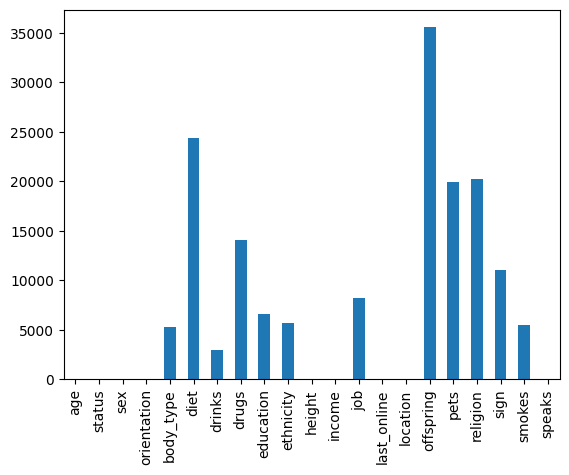

In [5]:
dataframe.isna().sum().plot(kind='bar')

This diagram shows the missing data for each attribute. Age, status, sex, orientation and location are probably mandatory if you want to register in the app, therefore there are no missing data points. 'last_online' is managed by the service itself, so there's no missing data aswell.

What is interesting is the type of data that people omit most often. The 'offspring' parameter is the one that stands out the most from the rest. It describes whether or not the person has kids or plans of having them. 

TODO: analyze the diet attribute. Group together vegetarian alike types, eat-all alike, and idk if there are other types rn. Put them together, and analyze how many are of them in % and draw some conclusions. We would use Aggregation and gather some points like this.

<AxesSubplot:xlabel='Count', ylabel='diet'>

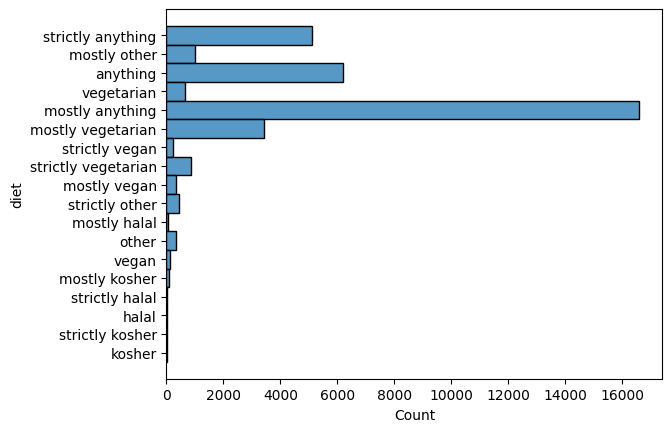

In [6]:
sns.histplot(dataframe, y = 'diet')

In [12]:
# dataframe_na = dataframe.dropna()
dataframe_na = dataframe.copy()

In [14]:
dataframe_na.fillna('MISSING', inplace =True)

In [22]:
dataframe_na['grouped_diet'] = dataframe_na['diet'].apply(lambda x : "veg" if (('vegetarian' or 'vegan') in x) 
                                                          else ("other" if ("other" in x) 
                                                                else ("anything" if ('anything' in x) 
                                                                      else ("religious" if (('halal' or 'kosher') in x) else 'missing' ))))

<AxesSubplot:xlabel='Count', ylabel='grouped_diet'>

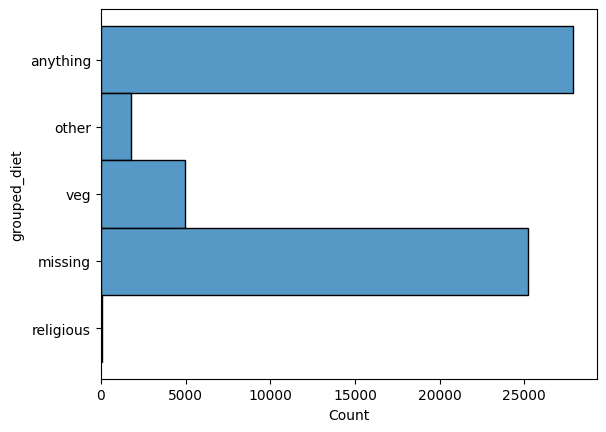

In [23]:
sns.histplot(dataframe_na, y = 'grouped_diet')